# Preprocessing

Imports:

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV

Let's look through our data for outliers, perform standardization/normalization and handle missing values. We will use dimensionality reduction if our dataset has a lot of features.

In [30]:
df = pd.read_csv("Breast_Cancer_dataset.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [31]:
df.shape

(4024, 16)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [33]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [34]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [35]:
numerical_columns = ["Age",	"Tumor Size",	"Regional Node Examined",	"Reginol Node Positive",	"Survival Months"]

In [36]:
categorical_columns =['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status']

for var in categorical_columns:
  unique = df[var].unique()
  print(f"Unique values in {var} are {unique}")

Unique values in Race are ['White' 'Black' 'Other']
Unique values in Marital Status are ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
Unique values in T Stage  are ['T1' 'T2' 'T3' 'T4']
Unique values in N Stage are ['N1' 'N2' 'N3']
Unique values in 6th Stage are ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Unique values in differentiate are ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Unique values in Grade are ['3' '2' '1' ' anaplastic; Grade IV']
Unique values in A Stage are ['Regional' 'Distant']
Unique values in Estrogen Status are ['Positive' 'Negative']
Unique values in Progesterone Status are ['Positive' 'Negative']
Unique values in Status are ['Alive' 'Dead']


We can see that we have no missing values in any of the columns and that all the categorical values are valid - none represent unknown or missing values.

We can also see that we are dealing with relatively small medical dataset so we will not be conducting dimensionality reduction as it will lead us to lose the interpretability of our outcomes.

Let's turn the Positive / Negative features into 1 and 0 as well as our target feature - Status:

In [37]:
bool_columns = ['Estrogen Status', 'Progesterone Status', 'Status']

def map_to_boolean(value):
    if value.lower() in ['negative', 'dead']:
        return 0
    elif value.lower() in ['positive', 'alive']:
        return 1
    else:
        return value

for column in bool_columns:
    df[column] = df[column].apply(map_to_boolean)

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,1,1,24,1,60,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,1,1,14,5,62,1
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,1,1,14,7,75,1
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,1,1,2,1,84,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,1,1,3,1,50,1


In [38]:
categorical_columns =['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage']

## One-hot-encoding

Let's turn all the categorical columns into numerical values

In [39]:
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,...,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional
0,68,4,1,1,24,1,60,1,False,False,...,False,True,False,False,False,False,False,True,False,True
1,50,35,1,1,14,5,62,1,False,False,...,True,False,False,False,False,False,True,False,False,True
2,58,63,1,1,14,7,75,1,False,False,...,True,False,False,False,False,False,True,False,False,True
3,58,18,1,1,2,1,84,1,False,False,...,False,True,False,False,False,False,False,True,False,True
4,47,41,1,1,3,1,50,1,False,False,...,False,True,False,False,False,False,False,True,False,True


In [40]:
df.shape

(4024, 38)

In [41]:
data = df[numerical_columns]

outlier_mask = pd.Series([False] * len(data)) # no outliers at beginning

# Iterate over each numerical column to update the mask and count outliers
for column in numerical_columns:
    # Calculate the 2.5th and 97.5th percentiles
    lower_bound = data[column].quantile(0.025)
    upper_bound = data[column].quantile(0.975)

    # Determine the outliers for the current column
    column_outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Update the outlier mask
    outlier_mask = outlier_mask | column_outlier_mask

    # Count the outliers
    num_outliers = column_outlier_mask.sum()

    # Print the number of outliers
    print(f"Number of outliers in column '{column}': {num_outliers}")

# Remove the rows with outliers
df_cleaned = df[~outlier_mask]

Number of outliers in column 'Age': 81
Number of outliers in column 'Tumor Size': 170
Number of outliers in column 'Regional Node Examined': 190
Number of outliers in column 'Reginol Node Positive': 101
Number of outliers in column 'Survival Months': 160


In [42]:
df_cleaned.shape

(3391, 38)

## Normalization

Let's normalize our numerical data to make sure it is all on the same scale:

In [43]:
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

<ipython-input-43-bfb5404691dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


In [44]:
df_cleaned.head()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,...,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional
1,-0.510322,0.326882,1,1,0.026473,0.388489,-0.525223,1,False,False,...,True,False,False,False,False,False,True,False,False,True
2,0.430040,1.921457,1,1,0.026473,0.926080,0.110842,1,False,False,...,True,False,False,False,False,False,True,False,False,True
3,0.430040,-0.641252,1,1,-1.742379,-0.686693,0.551195,1,False,False,...,False,True,False,False,False,False,False,True,False,True
4,-0.862957,0.668577,1,1,-1.594975,-0.686693,-1.112360,1,False,False,...,False,True,False,False,False,False,False,True,False,True
5,-0.392776,-0.527354,1,1,0.616090,-0.417897,0.795835,1,False,False,...,True,False,False,False,False,False,True,False,False,True


# Modeling

## Feature Selection and Feature Ranking

Let's apply the Sequential Forward selection and SVM to see which features are most relevant for our predictions.

### Sequential Forward Selection with Cross-Validation

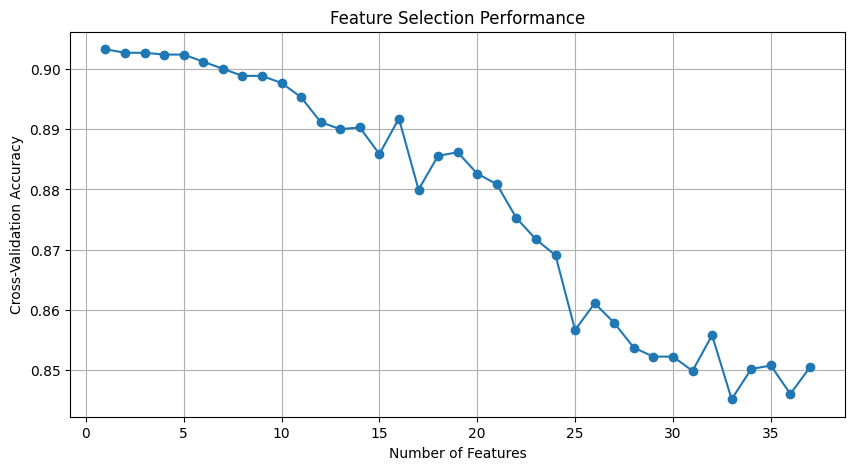

In [17]:
y = df_cleaned['Status']
X = df_cleaned.drop('Status', axis=1)

# Sequential Forward Selection with Cross-Validation
feature_nums = range(1, len(X.columns) + 1)
mean_scores = []

for k in feature_nums:
    sfs = SFS(DecisionTreeClassifier(),
              k_features=k,
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=5)  # using 5-fold cross-validation
    sfs = sfs.fit(X, y)
    mean_scores.append(sfs.k_score_)

# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(feature_nums, mean_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Feature Selection Performance')
plt.grid(True)
plt.show()

In [19]:
optimal_features = 15 #after this point the accuracy falls below 90% due to unnecessary complexity
print("Optimal number of features:", optimal_features)

sfs_optimal = SFS(DecisionTreeClassifier(),
                  k_features=optimal_features,
                  forward=True,
                  floating=False,
                  scoring='accuracy',
                  cv=5)
sfs_optimal = sfs_optimal.fit(X, y)
selected_features_sfs = X.columns[list(sfs_optimal.k_feature_idx_)]
print("Sequential Forward Selection selected features:", selected_features_sfs)

Optimal number of features: 15
Sequential Forward Selection selected features: Index(['Survival Months', 'Race_Black', 'Race_Other', 'Race_White',
       'Marital Status_Separated', 'T Stage _T4', 'N Stage_N3',
       '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated',
       'differentiate_Undifferentiated', 'Grade_ anaplastic; Grade IV',
       'Grade_2', 'A Stage_Distant', 'A Stage_Regional'],
      dtype='object')


### SVM Ranking

In [101]:
svm = SVC(kernel='linear')
svm.fit(X, y)

# Retrieve the abs coefficients of each feature
svm_ranking = [(column, abs(coef)) for column, coef in zip(X.columns, svm.coef_[0])]
svm_ranking.sort(key=lambda x: x[1], reverse=True)  # sorting by importance

importance_threshold = sorted([abs(coef) for _, coef in svm_ranking])[::-1][14] # top 15 features

# Selecting features above the threshold
selected_features_importance = [name for name, importance in svm_ranking if importance >= importance_threshold]
print("Features selected based on SVM importance threshold:", selected_features_importance)
print("SVM Ranking:", svm_ranking)

Features selected based on SVM importance threshold: ['Survival Months', 'differentiate_Undifferentiated', 'Grade_ anaplastic; Grade IV', 'T Stage _T4', 'Progesterone Status', 'Estrogen Status', 'N Stage_N1', 'Race_Other', 'Race_Black', '6th Stage_IIIC', 'N Stage_N3', 'differentiate_Well differentiated', 'Grade_1', 'T Stage _T1', 'Marital Status_Separated']
SVM Ranking: [('Survival Months', 0.6928651250789213), ('differentiate_Undifferentiated', 0.542973894166948), ('Grade_ anaplastic; Grade IV', 0.542973894166948), ('T Stage _T4', 0.4416792947069865), ('Progesterone Status', 0.30526534815881234), ('Estrogen Status', 0.27124824421973415), ('N Stage_N1', 0.23711547145945966), ('Race_Other', 0.20347051551911333), ('Race_Black', 0.16968050853969885), ('6th Stage_IIIC', 0.16959027155274775), ('N Stage_N3', 0.16959027155274775), ('differentiate_Well differentiated', 0.11843758310424812), ('Grade_1', 0.11843758310424812), ('T Stage _T1', 0.10199125077200932), ('Marital Status_Separated', 0.1

In [102]:
# Find the common features selected by both methods
common_features = list(set(selected_features_sfs).union(selected_features_importance))
print("Common features selected by both SFS and SVM:", common_features)
print("Common features selected by both SFS and SVM count:", len(common_features))

Common features selected by both SFS and SVM: ['6th Stage_IIIC', 'A Stage_Regional', 'T Stage _T1', 'A Stage_Distant', '6th Stage_IIIB', 'Race_White', 'N Stage_N1', 'T Stage _T4', 'differentiate_Undifferentiated', 'Progesterone Status', 'differentiate_Moderately differentiated', 'Race_Other', 'Marital Status_Separated', 'Grade_2', 'Survival Months', 'differentiate_Well differentiated', 'N Stage_N3', 'Grade_1', 'Estrogen Status', 'Grade_ anaplastic; Grade IV', 'Race_Black']
Common features selected by both SFS and SVM count: 21


In [103]:
common_features.append('Status')
df_cleaned = df_cleaned[common_features]
df_cleaned.head()

,6th Stage_IIIC,A Stage_Regional,T Stage _T1,A Stage_Distant,6th Stage_IIIB,Race_White,N Stage_N1,T Stage _T4,differentiate_Undifferentiated,Progesterone Status,...,Marital Status_Separated,Grade_2,Survival Months,differentiate_Well differentiated,N Stage_N3,Grade_1,Estrogen Status,Grade_ anaplastic; Grade IV,Race_Black,Status
1,False,True,False,False,False,True,False,False,False,1,...,False,True,-0.525223,False,False,False,1,False,False,1
2,True,True,False,False,False,True,False,False,False,1,...,False,True,0.110842,False,True,False,1,False,False,1
3,False,True,True,False,False,True,True,False,False,1,...,False,False,0.551195,False,False,False,1,False,False,1
4,False,True,False,False,False,True,True,False,False,1,...,False,False,-1.112360,False,False,False,1,False,False,1
5,False,True,True,False,False,True,True,False,False,1,...,False,True,0.795835,False,False,False,1,False,False,1


In [104]:
df_cleaned.shape

(3391, 22)

## KNN

In [65]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x_test in X_test:
        # Calculate the distance from this point to all training points
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

        # Indices of the k smallest distances
        k_indices = np.argsort(distances)[:k]

        # Classes of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Predict the class by taking the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common)

    return predictions


# Convert DataFrame to numpy array
X = df_cleaned.drop('Status', axis=1).values
y = df_cleaned['Status'].values

# Splitting the dataset into train and test sets (80/20 split)
indices = np.random.permutation(len(X))
train_indices = indices[:int(0.8 * len(X))]
test_indices = indices[int(0.8 * len(X)):]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Running KNN
predicted_labels = knn_predict(X_train, y_train, X_test, k=3)

# Confusion matrix
cm_knn = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", cm_knn)

# Accuracy
accuracy_knn = np.mean(predicted_labels == y_test)
print("Accuracy:", accuracy_knn)

# Classification report
report_knn = classification_report(y_test, predicted_labels, output_dict=True)
print("Classification Report:\n", report_knn)

Confusion Matrix:
 [[ 32  44]
 [ 27 576]]
Accuracy: 0.8954344624447718
Classification Report:
 {'0': {'precision': 0.5423728813559322, 'recall': 0.42105263157894735, 'f1-score': 0.47407407407407404, 'support': 76}, '1': {'precision': 0.9290322580645162, 'recall': 0.9552238805970149, 'f1-score': 0.9419460343417825, 'support': 603}, 'accuracy': 0.8954344624447718, 'macro avg': {'precision': 0.7357025697102242, 'recall': 0.6881382560879812, 'f1-score': 0.7080100542079283, 'support': 679}, 'weighted avg': {'precision': 0.885753741672981, 'recall': 0.8954344624447718, 'f1-score': 0.8895774496873704, 'support': 679}}


## Naïve Bayes



In [66]:
# Prepare the data
X = df_cleaned.drop('Status', axis=1).values
y = df_cleaned['Status'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = nb_classifier.predict(X_test)

# Generate the confusion matrix and classification report
cm_nb = confusion_matrix(y_test, y_pred)
acc_nb = accuracy_score(y_test, y_pred)
report_nb = classification_report(y_test, y_pred, output_dict=True)

print("Confusion Matrix:\n", cm_nb)
print("Accuracy:", acc_nb)
print("Classification Report:\n", report_nb)

Confusion Matrix:
 [[ 31  59]
 [ 70 519]]
Accuracy: 0.8100147275405007
Classification Report:
 {'0': {'precision': 0.3069306930693069, 'recall': 0.34444444444444444, 'f1-score': 0.324607329842932, 'support': 90}, '1': {'precision': 0.8979238754325259, 'recall': 0.8811544991511036, 'f1-score': 0.8894601542416453, 'support': 589}, 'accuracy': 0.8100147275405007, 'macro avg': {'precision': 0.6024272842509164, 'recall': 0.612799471797774, 'f1-score': 0.6070337420422887, 'support': 679}, 'weighted avg': {'precision': 0.8195889911723055, 'recall': 0.8100147275405007, 'f1-score': 0.814590118607059, 'support': 679}}


## C4.5 Decision Tree

In [67]:
# Prepare the data
X = df_cleaned.drop('Status', axis=1).values
y = df_cleaned['Status'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)  # using entropy for information gain

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = dt_classifier.predict(X_test)

# Generate metrics
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred, output_dict=True)

print("Decision Tree Confusion Matrix:\n", cm_dt)
print("Accuracy:", acc_dt)
print("Classification Report:\n", report_dt)


Decision Tree Confusion Matrix:
 [[ 40  50]
 [ 52 537]]
Accuracy: 0.8497790868924889
Classification Report:
 {'0': {'precision': 0.43478260869565216, 'recall': 0.4444444444444444, 'f1-score': 0.4395604395604396, 'support': 90}, '1': {'precision': 0.9148211243611585, 'recall': 0.9117147707979627, 'f1-score': 0.9132653061224489, 'support': 589}, 'accuracy': 0.8497790868924889, 'macro avg': {'precision': 0.6748018665284053, 'recall': 0.6780796076212036, 'f1-score': 0.6764128728414442, 'support': 679}, 'weighted avg': {'precision': 0.8511930442287645, 'recall': 0.8497790868924889, 'f1-score': 0.8504767376532577, 'support': 679}}


## Random Forest

In [68]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_classifier.predict(X_test)

# Generate metrics
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred, output_dict=True)

print("Random Forest Confusion Matrix:\n", cm_rf)
print("Accuracy:", acc_rf)
print("Classification Report:\n", report_rf)

Random Forest Confusion Matrix:
 [[ 40  50]
 [ 37 552]]
Accuracy: 0.8718703976435935
Classification Report:
 {'0': {'precision': 0.5194805194805194, 'recall': 0.4444444444444444, 'f1-score': 0.47904191616766467, 'support': 90}, '1': {'precision': 0.9169435215946844, 'recall': 0.9371816638370118, 'f1-score': 0.9269521410579344, 'support': 589}, 'accuracy': 0.8718703976435935, 'macro avg': {'precision': 0.7182120205376019, 'recall': 0.6908130541407281, 'f1-score': 0.7029970286127996, 'support': 679}, 'weighted avg': {'precision': 0.8642606494440588, 'recall': 0.8718703976435935, 'f1-score': 0.867582597258046, 'support': 679}}


## Gradient Boosting

In [69]:
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = gb_classifier.predict(X_test)

# Generate metrics
cm_gb = confusion_matrix(y_test, y_pred)
acc_gb = accuracy_score(y_test, y_pred)
report_gb = classification_report(y_test, y_pred, output_dict=True)

print("Gradient Boosting Confusion Matrix:\n", cm_gb)
print("Accuracy:", acc_gb)
print("Classification Report:\n", report_gb)

Gradient Boosting Confusion Matrix:
 [[ 41  49]
 [ 10 579]]
Accuracy: 0.9131075110456554
Classification Report:
 {'0': {'precision': 0.803921568627451, 'recall': 0.45555555555555555, 'f1-score': 0.5815602836879433, 'support': 90}, '1': {'precision': 0.9219745222929936, 'recall': 0.9830220713073005, 'f1-score': 0.9515201314708299, 'support': 589}, 'accuracy': 0.9131075110456554, 'macro avg': {'precision': 0.8629480454602223, 'recall': 0.719288813431428, 'f1-score': 0.7665402075793866, 'support': 679}, 'weighted avg': {'precision': 0.9063268553859262, 'recall': 0.9131075110456554, 'f1-score': 0.9024827436940113, 'support': 679}}


# Hyperparameter Tuning

Pick any 2 of the above algorithms that contain at least 2 hyperparameters and perform a hyperparameter search using either Grid or Random search. Display the performance metrics and conclude which set of hyperparameters worked the best.

In [71]:
# Prepare the data
X = df_cleaned.drop('Status', axis=1).values
y = df_cleaned['Status'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None]
}

# GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# Parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=3, verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best parameters and model for Gradient Boosting
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb = grid_search_gb.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
cm_rf_ht = confusion_matrix(y_test, y_pred_rf)
acc_rf_ht = accuracy_score(y_test, y_pred_rf)
report_rf_ht = classification_report(y_test, y_pred_rf, output_dict=True)

print("Random Forest - Confusion Matrix:\n", cm_rf_ht)
print("Random Forest - Accuracy:", acc_rf_ht)
print("Random Forest - Classification Report:\n", report_rf_ht)

# Evaluate Gradient Boosting
y_pred_gb = best_gb.predict(X_test)
cm_gb_ht = confusion_matrix(y_test, y_pred_gb)
acc_gb_ht = accuracy_score(y_test, y_pred_gb)
report_gb_ht = classification_report(y_test, y_pred_gb, output_dict=True)

print("Gradient Boosting - Confusion Matrix:\n", cm_gb_ht)
print("Gradient Boosting - Accuracy:", acc_gb_ht)
print("Gradient Boosting - Classification Report:\n", report_gb_ht)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Random Forest - Confusion Matrix:
 [[ 39  51]
 [ 14 575]]
Random Forest - Accuracy: 0.9042709867452136
Random Forest - Classification Report:
 {'0': {'precision': 0.7358490566037735, 'recall': 0.43333333333333335, 'f1-score': 0.5454545454545455, 'support': 90}, '1': {'precision': 0.9185303514376997, 'recall': 0.9762308998302207, 'f1-score': 0.9465020576131687, 'support': 589}, 'accuracy': 0.9042709867452136, 'macro avg': {'precision': 0.8271897040207365, 'recall': 0.704782116581777, 'f1-score': 0.7459783015338571, 'support': 679}, 'weighted avg': {'precision': 0.8943163359221572, 'recall': 0.9042709867452136, 'f1-score': 0.8933440663108476, 'support': 679}}
Gradient Boosting - Confusion Matrix:
 [[ 41  49]
 [  9 580]]
Gradient Boost

# Results

In [100]:
def parse_classification_report(report):
    # Assuming binary classification; for multi-class, you might want to get 'macro avg' or 'weighted avg'
    metrics = report['binary'] if 'binary' in report else report['macro avg']
    precision = metrics['precision']
    recall = metrics['recall']
    f1 = metrics['f1-score']
    return precision, recall, f1

# Parsing the classification reports
prec_knn, rec_knn, f1_knn = parse_classification_report(report_knn)
prec_nb, rec_nb, f1_nb = parse_classification_report(report_nb)
prec_dt, rec_dt, f1_dt = parse_classification_report(report_dt)
prec_rf, rec_rf, f1_rf = parse_classification_report(report_rf)
prec_gb, rec_gb, f1_gb = parse_classification_report(report_gb)

prec_rf_ht, rec_rf_ht, f1_rf_ht = parse_classification_report(report_rf_ht)
prec_gb_ht, rec_gb_ht, f1_gb_ht = parse_classification_report(report_gb_ht)

# Create the table in Markdown
markdown_table = f"""
| Model Name          | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| KNN                 | {accuracy_knn:.4f}   | {prec_knn:.4f}    | {rec_knn:.4f} | {f1_knn:.4f}   |
| Naïve Bayes         | {acc_nb:.4f}   | {prec_nb:.4f}    | {rec_nb:.4f} | {f1_nb:.4f}   |
| C4.5 Decision Tree  | {acc_dt:.4f}   | {prec_dt:.4f}    | {rec_dt:.4f} | {f1_dt:.4f}   |
| Random Forest       | {acc_rf:.4f}   | {prec_rf:.4f}    | {rec_rf:.4f} | {f1_rf:.4f}   |
| Gradient Boosting   | {acc_gb:.4f}   | {prec_gb:.4f}    | {rec_gb:.4f} | {f1_gb:.4f}   |
| Random Forest HT    | {acc_rf_ht:.4f}   | {prec_rf_ht:.4f}    | {rec_rf_ht:.4f} | {f1_rf_ht:.4f}   |
| Gradient Boosting HT| {acc_gb_ht:.4f}   | {prec_gb_ht:.4f}    | {rec_gb_ht:.4f} | {f1_gb_ht:.4f}   |
"""

print(markdown_table)


| Model Name          | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| KNN                 | 0.8954   | 0.7357    | 0.6881 | 0.7080   |
| Naïve Bayes         | 0.8100   | 0.6024    | 0.6128 | 0.6070   |
| C4.5 Decision Tree  | 0.8498   | 0.6748    | 0.6781 | 0.6764   |
| Random Forest       | 0.8719   | 0.7182    | 0.6908 | 0.7030   |
| Gradient Boosting   | 0.9131   | 0.8629    | 0.7193 | 0.7665   |
| Random Forest HT    | 0.9043   | 0.8272    | 0.7048 | 0.7460   |
| Gradient Boosting HT| 0.9146   | 0.8710    | 0.7201 | 0.7690   |



In [83]:
important_features_dt = dt_classifier.feature_importances_
important_features_rf = rf_classifier.feature_importances_
important_features_gb = gb_classifier.feature_importances_

important_features_rf_ht = best_rf.feature_importances_
important_features_gb_ht = best_gb.feature_importances_

# Get feature names from your dataset
X = df_cleaned.drop('Status', axis=1)
feature_names = X.columns

# Pair feature names with their importance scores
features_dt = sorted(zip(feature_names, important_features_dt), key=lambda x: x[1], reverse=True)
features_rf = sorted(zip(feature_names, important_features_rf), key=lambda x: x[1], reverse=True)
features_gb = sorted(zip(feature_names, important_features_gb), key=lambda x: x[1], reverse=True)
features_rf_ht = sorted(zip(feature_names, important_features_rf_ht), key=lambda x: x[1], reverse=True)
features_gb_ht = sorted(zip(feature_names, important_features_gb_ht), key=lambda x: x[1], reverse=True)



print("Most relevant featured for C4.5 Decision Tree:", features_dt)
print("Most relevant featured for Random Forest (pre-hyperparameter tuning):", features_rf)
print("Most relevant featured for Gradient Bosting (pre-hyperparameter tuning):", features_gb)

print()

print("Most relevant featured for Random Forest (post-hyperparameter tuning):", features_rf_ht)
print("Most relevant featured for Gradient Bosting (post-hyperparameter tuning):", features_gb_ht)

Most relevant featured for C4.5 Decision Tree: [('Survival Months', 0.6306237208265373), ('T Stage _T1', 0.06196069899436706), ('Progesterone Status', 0.04377088147432464), ('N Stage_N1', 0.03676550605228982), ('differentiate_Moderately differentiated', 0.02157501842528135), ('Grade_1', 0.021443031547837176), ('Race_Black', 0.02140640732154964), ('Estrogen Status', 0.021174610817980177), ('Grade_2', 0.01969310342902153), ('6th Stage_IIIA', 0.018310531471317695), ('Race_White', 0.017283054714801013), ('Marital Status_Separated', 0.0156250519223387), ('N Stage_N3', 0.014404973459863493), ('Race_Other', 0.010957718027757506), ('6th Stage_IIIC', 0.00925585185610517), ('differentiate_Well differentiated', 0.008575634300752349), ('A Stage_Distant', 0.007399813509214269), ('T Stage _T4', 0.006610737467361336), ('6th Stage_IIIB', 0.005528946739766923), ('A Stage_Regional', 0.004330106492949063), ('differentiate_Undifferentiated', 0.0033046011485839046), ('Grade_ anaplastic; Grade IV', 0.0)]
Mo